<a href="https://colab.research.google.com/github/surekavin/Linear-Regression/blob/main/linearreg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment8

How Much is Your Car Worth?
Data about the retail price of 2005 General Motors cars can be found in car_data.csv.

The columns are:

Price: suggested retail price of the used 2005 GM car in excellent condition.
Mileage: number of miles the car has been driven
Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D
Type: body type such as sedan, coupe, etc.
Cylinder: number of cylinders in the engine
Liter: a more specific measure of engine size
Doors: number of doors
Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
Leather: indicator variable representing whether the car has leather seats (1 = leather)
Tasks, Part 1
Find the linear regression equation for mileage vs price.
Chart the original data and the equation on the chart.
Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
Tasks, Part 2
Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
Find the combination of the factors that is the best predictor for price.
Tasks, Hard Mode
Research dummy variables in scikit-learn to see how to use the make, model, and body type.
Find the best combination of factors to predict price.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [ ]:
df = pd.read_csv("/content/car_data.csv")

FileNotFoundError: ignored

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.describe()

In [ ]:
iqr = df.Mileage.quantile(0.75) - df.Mileage.quantile(0.25)
upper_threshold = df.Mileage.quantile(0.75) + (1.5 * iqr) 
lower_threshold = df.Mileage.quantile(0.25) - (1.5 * iqr) 
upper_threshold,lower_threshold

In [ ]:
df.shape

In [ ]:
df.plot(x='Mileage',y='Price',style='o')
plt.title('mileage vs price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [ ]:
df[['Mileage','Price']].corr()

there is no linear relationship between mileage and price

In [ ]:
Car_Features=["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"]
Car_Price=["Price"]
x=df[Car_Features]
y=df[Car_Price]
from itertools import combinations
com=[]
for i in range(1,7):
  com.append(combinations(Car_Features,i))
check_score=0
for combin in com:
  for groupx in combin:
    groupx=list(groupx)
    x=df[groupx]
    model=linear_model.LinearRegression(fit_intercept=False)
    model=model.fit(x,y)
    model_score=model.score(x,y)
    if check_score<model.score(x,y):
      check_score=model.score(x,y)
      maxgroup=groupx
print(maxgroup,'model_score=', check_score)        

['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather'] model_score= 0.43379675084762104


In [ ]:
iqr = df.Leather.quantile(0.75) - df.Leather.quantile(0.25)
upper_threshold = df.Leather.quantile(0.75) + (1.5 * iqr) 
lower_threshold = df.Leather.quantile(0.25) - (1.5 * iqr) 
upper_threshold,lower_threshold

(2.5, -1.5)

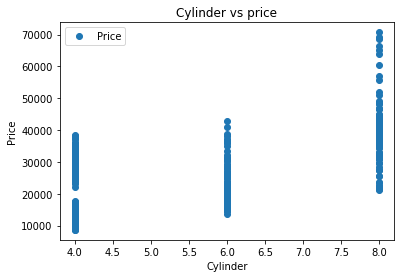

In [ ]:
df.plot(x='Cylinder',y='Price',style='o')
plt.title('Cylinder vs price')
plt.xlabel('Cylinder')
plt.ylabel('Price')
plt.show()

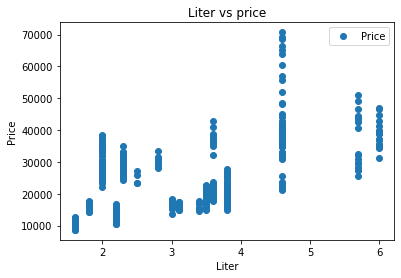

In [ ]:
df.plot(x='Liter',y='Price',style='o')
plt.title('Liter vs price')
plt.xlabel('Liter')
plt.ylabel('Price')
plt.show()

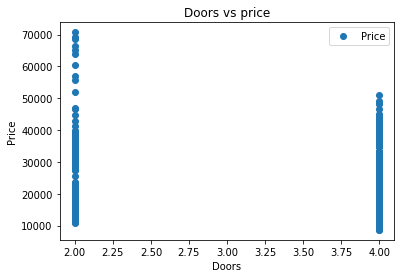

In [ ]:
df.plot(x='Doors',y='Price',style='o')
plt.title('Doors vs price')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.show()

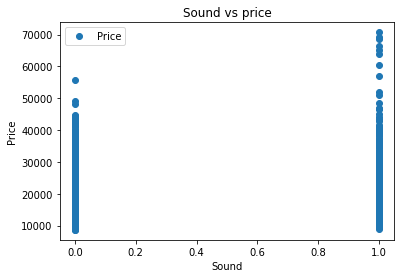

In [ ]:
df.plot(x='Sound',y='Price',style='o')
plt.title('Sound vs price')
plt.xlabel('Sound')
plt.ylabel('Price')
plt.show()

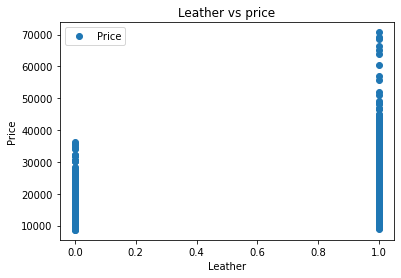

In [ ]:
df.plot(x='Leather',y='Price',style='o')
plt.title('Leather vs price')
plt.xlabel('Leather')
plt.ylabel('Price')
plt.show()

In [ ]:
df[['Cylinder','Price']].corr()

,Cylinder,Price
Cylinder,1.000000,0.569086
Price,0.569086,1.000000


In [ ]:
df[['Liter','Price']].corr()

,Liter,Price
Liter,1.000000,0.558146
Price,0.558146,1.000000


In [ ]:
df[['Doors','Price']].corr()

,Doors,Price
Doors,1.00000,-0.13875
Price,-0.13875,1.00000


In [ ]:
df[['Sound','Price']].corr()

,Sound,Price
Sound,1.000000,-0.124348
Price,-0.124348,1.000000


In [ ]:
df[['Leather','Price']].corr()

,Leather,Price
Leather,1.000000,0.157197
Price,0.157197,1.000000


In [ ]:
df[['Cruise','Price']].corr()

,Cruise,Price
Cruise,1.000000,0.430851
Price,0.430851,1.000000


In [ ]:
x=df[["Cylinder","Liter","Cruise"]].values
y=df["Price"].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train) 
x_train_scaled = scaler.transform(x_train) 
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,["Cylinder","Liter","Cruise"], columns=['Coefficient'])
y_pred = regressor.predict(x_test_scaled)
coeff_df

,Coefficient
Cylinder,5284.488112
Liter,-206.602311
Cruise,2482.987036


In [ ]:
regressor.predict(scaler.transform(np.array([[3500,0.5,2000]])))

array([24844868.18572412])

In [ ]:
regressor.intercept_

21557.827411544306

In [ ]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,17458.221529,25613.237578
1,18063.004911,25557.295110
2,26831.194037,25557.295110
3,17801.229528,25613.237578
4,14275.127635,18282.898064
...,...,...
237,45061.951935,32980.872070
238,35033.215454,18264.250575
239,10921.945372,12597.339645
240,11873.533995,12485.454710


In [ ]:
from sklearn import metrics
print('R2-SCORE:',metrics.r2_score(y_test,y_pred))

R2-SCORE: 0.346856121338034


Boston Housing Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("/content/train.csv")

In [ ]:
df.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8


In [ ]:
df.describe()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,3.757191,10.970000,10.936425,0.072500,0.552817,6.292165,68.086000,3.819462,9.462500,403.797500,18.459000,359.455375,12.668525,22.475750
std,115.614301,9.155496,22.796261,6.848042,0.259639,0.115488,0.709923,28.386888,2.132445,8.687478,169.656816,2.148105,86.732906,7.207047,9.218611
min,0.000000,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.920000,5.000000
25%,99.750000,0.077820,0.000000,5.130000,0.000000,0.449000,5.877500,42.375000,2.109150,4.000000,277.000000,17.400000,376.115000,6.990000,17.100000
50%,199.500000,0.242170,0.000000,8.560000,0.000000,0.532000,6.208500,76.950000,3.272100,5.000000,329.000000,18.950000,391.575000,10.875000,21.000000
75%,299.250000,3.543427,12.500000,18.100000,0.000000,0.624000,6.620500,93.825000,5.214600,24.000000,666.000000,20.200000,396.285000,16.910000,25.000000
max,399.000000,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.isnull().sum()

ID         0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
df.dtypes

ID           int64
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.describe()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,3.757191,10.970000,10.936425,0.072500,0.552817,6.292165,68.086000,3.819462,9.462500,403.797500,18.459000,359.455375,12.668525,22.475750
std,115.614301,9.155496,22.796261,6.848042,0.259639,0.115488,0.709923,28.386888,2.132445,8.687478,169.656816,2.148105,86.732906,7.207047,9.218611
min,0.000000,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.920000,5.000000
25%,99.750000,0.077820,0.000000,5.130000,0.000000,0.449000,5.877500,42.375000,2.109150,4.000000,277.000000,17.400000,376.115000,6.990000,17.100000
50%,199.500000,0.242170,0.000000,8.560000,0.000000,0.532000,6.208500,76.950000,3.272100,5.000000,329.000000,18.950000,391.575000,10.875000,21.000000
75%,299.250000,3.543427,12.500000,18.100000,0.000000,0.624000,6.620500,93.825000,5.214600,24.000000,666.000000,20.200000,396.285000,16.910000,25.000000
max,399.000000,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
iqr = df.ID.quantile(0.75) - df.ID.quantile(0.25)
upper_threshold = df.ID.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.ID.quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(598.5, -199.5)

In [ ]:
RM=df.RM.clip(5,8)

In [ ]:
DIS=df.DIS.clip(-3,10)

In [ ]:
B=df.B.clip(346,426)

In [ ]:
LSTAT=df.LSTAT.clip(-8,32)

In [ ]:
df.shape

(400, 15)

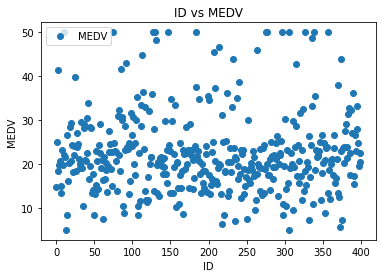

In [ ]:
df.plot(x='ID', y='MEDV', style='o')
plt.title('ID vs MEDV')
plt.xlabel('ID')
plt.ylabel('MEDV')
plt.show()

In [ ]:
df[['ID','MEDV']].corr()

,ID,MEDV
ID,1.000000,0.006956
MEDV,0.006956,1.000000


In [ ]:
this feature not needed

SyntaxError: ignored

In [ ]:
df[['CRIM','MEDV']].corr()

,CRIM,MEDV
CRIM,1.000000,-0.393693
MEDV,-0.393693,1.000000


In [ ]:
df[['ZN','MEDV']].corr()

,ZN,MEDV
ZN,1.000000,0.336805
MEDV,0.336805,1.000000


In [ ]:
df[['INDUS','MEDV']].corr()

,INDUS,MEDV
INDUS,1.000000,-0.502898
MEDV,-0.502898,1.000000


In [ ]:
df[['CHAS','MEDV']].corr()

,CHAS,MEDV
CHAS,1.000000,0.182096
MEDV,0.182096,1.000000


In [ ]:
df[['NOX','MEDV']].corr()

,NOX,MEDV
NOX,1.000000,-0.434271
MEDV,-0.434271,1.000000


In [ ]:
df[['RM','MEDV']].corr()

,RM,MEDV
RM,1.000000,0.721489
MEDV,0.721489,1.000000


In [ ]:
df[['AGE','MEDV']].corr()

,AGE,MEDV
AGE,1.000000,-0.354106
MEDV,-0.354106,1.000000


In [ ]:
df[['DIS','MEDV']].corr()

,DIS,MEDV
DIS,1.000000,0.235087
MEDV,0.235087,1.000000


In [ ]:
df[['RAD','MEDV']].corr()

,RAD,MEDV
RAD,1.000000,-0.386922
MEDV,-0.386922,1.000000


In [ ]:
df[['TAX','MEDV']].corr()

,TAX,MEDV
TAX,1.000000,-0.479308
MEDV,-0.479308,1.000000


In [ ]:
df[['PTRATIO','MEDV']].corr()

,PTRATIO,MEDV
PTRATIO,1.000000,-0.495904
MEDV,-0.495904,1.000000


In [ ]:
df[['B','MEDV']].corr()

,B,MEDV
B,1.00000,0.31791
MEDV,0.31791,1.00000


In [ ]:
df[['LSTAT','MEDV']].corr()

,LSTAT,MEDV
LSTAT,1.000000,-0.725281
MEDV,-0.725281,1.000000


In [ ]:
x=df[["ZN","RM","DIS","B"]].values
y=df[["MEDV"]].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(x_train) 
x_train_scaled = scaler.transform(x_train) 
X_test_scaled = scaler.transform(x_test)  

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['ZN','RM','DIS','B'], columns=['Coefficient'])
y_pred = regressor.predict(x_test_scaled)
coeff_df

ValueError: ignored